In [5]:
import pandas as pd
df = pd.read_csv('json_flattened.csv')
df.head()

,Unnamed: 0,trace_id,user_query,final_output,metadata.user_id,metadata.region,metadata.timestamp,metrics.faithfulness,metrics.relevance,metrics.cost_usd,...,output_docs,model,temperature,output,token_usage.prompt_tokens,token_usage.completion_tokens,input,output.fr,output.es,output.it
0,0,trace_001,Who won the 2018 World Cup?,France (2018 FIFA World Cup winner),u123,EU,2025-09-24T20:15:00Z,1.00,0.97,0.0025,...,"[{'id': 'doc1', 'title': '2018 FIFA Final', 'c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,trace_001,Who won the 2018 World Cup?,France (2018 FIFA World Cup winner),u123,EU,2025-09-24T20:15:00Z,1.00,0.97,0.0025,...,NaN,gpt-4,0.2,"France won the 2018 FIFA World Cup, beating Cr...",60.0,25.0,NaN,NaN,NaN,NaN
2,2,trace_002,Explain quantum entanglement simply.,Quantum entanglement means two particles behav...,u456,US,2025-09-24T20:16:00Z,0.92,0.95,0.0038,...,NaN,NaN,NaN,Explain in simple words: quantum entanglement...,NaN,NaN,Explain quantum entanglement simply.,NaN,NaN,NaN
3,3,trace_002,Explain quantum entanglement simply.,Quantum entanglement means two particles behav...,u456,US,2025-09-24T20:16:00Z,0.92,0.95,0.0038,...,NaN,gpt-4,0.7,Quantum entanglement is like having two dice t...,45.0,60.0,NaN,NaN,NaN,NaN
4,4,trace_003,"Translate 'Hello World' into French, Spanish, ...",NaN,u789,APAC,2025-09-24T20:18:00Z,1.00,1.00,0.0012,...,NaN,gpt-4,0.0,NaN,30.0,15.0,NaN,Bonjour le monde,Hola mundo,Ciao mondo


In [7]:
## Shape of the dataframe
df.shape

(5, 27)

In [8]:
## info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     5 non-null      int64  
 1   trace_id                       5 non-null      object 
 2   user_query                     5 non-null      object 
 3   final_output                   4 non-null      object 
 4   metadata.user_id               5 non-null      object 
 5   metadata.region                5 non-null      object 
 6   metadata.timestamp             5 non-null      object 
 7   metrics.faithfulness           5 non-null      float64
 8   metrics.relevance              5 non-null      float64
 9   metrics.cost_usd               5 non-null      float64
 10  final_output.fr                1 non-null      object 
 11  final_output.es                1 non-null      object 
 12  final_output.it                1 non-null      object 

In [9]:
## describe
df.describe()

,Unnamed: 0,metrics.faithfulness,metrics.relevance,metrics.cost_usd,version,latency_ms,temperature,token_usage.prompt_tokens,token_usage.completion_tokens
count,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,3.000000,3.0,3.000000
mean,2.000000,0.968000,0.968000,0.002760,1.0,222.000000,0.300000,45.0,33.333333
std,1.581139,0.043818,0.020494,0.001088,0.0,136.638208,0.360555,15.0,23.629078
min,0.000000,0.920000,0.950000,0.001200,1.0,50.000000,0.000000,30.0,15.000000
25%,1.000000,0.920000,0.950000,0.002500,1.0,150.000000,0.100000,37.5,20.000000
50%,2.000000,1.000000,0.970000,0.002500,1.0,200.000000,0.200000,45.0,25.000000
75%,3.000000,1.000000,0.970000,0.003800,1.0,310.000000,0.450000,52.5,42.500000
max,4.000000,1.000000,1.000000,0.003800,1.0,400.000000,0.700000,60.0,60.000000


In [10]:
## Missing values per column
df.isna().sum()

Unnamed: 0                       0
trace_id                         0
user_query                       0
final_output                     1
metadata.user_id                 0
metadata.region                  0
metadata.timestamp               0
metrics.faithfulness             0
metrics.relevance                0
metrics.cost_usd                 0
final_output.fr                  4
final_output.es                  4
final_output.it                  4
project                          0
version                          0
name                             0
latency_ms                       0
output_docs                      4
model                            2
temperature                      2
output                           2
token_usage.prompt_tokens        2
token_usage.completion_tokens    2
input                            4
output.fr                        4
output.es                        4
output.it                        4
dtype: int64

In [11]:
# correlation matrix
df.corr(numeric_only=True)

,Unnamed: 0,metrics.faithfulness,metrics.relevance,metrics.cost_usd,version,latency_ms,temperature,token_usage.prompt_tokens,token_usage.completion_tokens
Unnamed: 0,1.000000,-2.886751e-01,0.308607,-0.188982,NaN,0.219863,-0.090784,-9.819805e-01,-0.023088
metrics.faithfulness,-0.288675,1.000000e+00,0.801784,-0.872872,NaN,-0.020043,-0.960769,-6.409876e-16,-0.977356
metrics.relevance,0.308607,8.017837e-01,1.000000,-0.991460,NaN,-0.069637,-0.936766,-5.960396e-01,-0.910897
metrics.cost_usd,-0.188982,-8.728716e-01,-0.991460,1.000000,NaN,0.061232,0.970725,5.000000e-01,0.952217
version,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latency_ms,0.219863,-2.004280e-02,-0.069637,0.061232,NaN,1.000000,0.955267,5.490856e-01,0.933029
temperature,-0.090784,-9.607689e-01,-0.936766,0.970725,NaN,0.955267,1.000000,2.773501e-01,0.997701
token_usage.prompt_tokens,-0.981981,-6.409876e-16,-0.596040,0.500000,NaN,0.549086,0.277350,1.000000e+00,0.211604
token_usage.completion_tokens,-0.023088,-9.773556e-01,-0.910897,0.952217,NaN,0.933029,0.997701,2.116037e-01,1.000000


In [12]:
## Next level commands


In [13]:
# GroupBy
df.groupby("trace_id")["latency_ms"].mean()

trace_id
trace_001    230.0
trace_002    225.0
trace_003    200.0
Name: latency_ms, dtype: float64

In [14]:
# Multi-Aggregation on groups
df.groupby("metadata.region")[["metrics.faithfulness", "metrics.relevance"]].agg(["mean", "std", "count"])

metrics.faithfulness            metrics.relevance           
                                mean  std count              mean  std count
metadata.region                                                             
APAC                            1.00  NaN     1              1.00  NaN     1
EU                              1.00  0.0     2              0.97  0.0     2
US                              0.92  0.0     2              0.95  0.0     2

In [15]:
# Crosstab (like pivot table)
pd.crosstab(df["metadata.region"], df["name"])

name,llm_generation,prompt_construction,retrieval
metadata.region,,,
APAC,1,0,0
EU,1,0,1
US,1,1,0


In [17]:
# 4. Sort by a numeric column
df.sort_values("latency_ms", ascending=False).head()

,Unnamed: 0,trace_id,user_query,final_output,metadata.user_id,metadata.region,metadata.timestamp,metrics.faithfulness,metrics.relevance,metrics.cost_usd,...,output_docs,model,temperature,output,token_usage.prompt_tokens,token_usage.completion_tokens,input,output.fr,output.es,output.it
3,3,trace_002,Explain quantum entanglement simply.,Quantum entanglement means two particles behav...,u456,US,2025-09-24T20:16:00Z,0.92,0.95,0.0038,...,NaN,gpt-4,0.7,Quantum entanglement is like having two dice t...,45.0,60.0,NaN,NaN,NaN,NaN
1,1,trace_001,Who won the 2018 World Cup?,France (2018 FIFA World Cup winner),u123,EU,2025-09-24T20:15:00Z,1.00,0.97,0.0025,...,NaN,gpt-4,0.2,"France won the 2018 FIFA World Cup, beating Cr...",60.0,25.0,NaN,NaN,NaN,NaN
4,4,trace_003,"Translate 'Hello World' into French, Spanish, ...",NaN,u789,APAC,2025-09-24T20:18:00Z,1.00,1.00,0.0012,...,NaN,gpt-4,0.0,NaN,30.0,15.0,NaN,Bonjour le monde,Hola mundo,Ciao mondo
0,0,trace_001,Who won the 2018 World Cup?,France (2018 FIFA World Cup winner),u123,EU,2025-09-24T20:15:00Z,1.00,0.97,0.0025,...,"[{'id': 'doc1', 'title': '2018 FIFA Final', 'c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,trace_002,Explain quantum entanglement simply.,Quantum entanglement means two particles behav...,u456,US,2025-09-24T20:16:00Z,0.92,0.95,0.0038,...,NaN,NaN,NaN,Explain in simple words: quantum entanglement...,NaN,NaN,Explain quantum entanglement simply.,NaN,NaN,NaN


<Axes: title={'center': 'Latency distribution'}, ylabel='Frequency'>

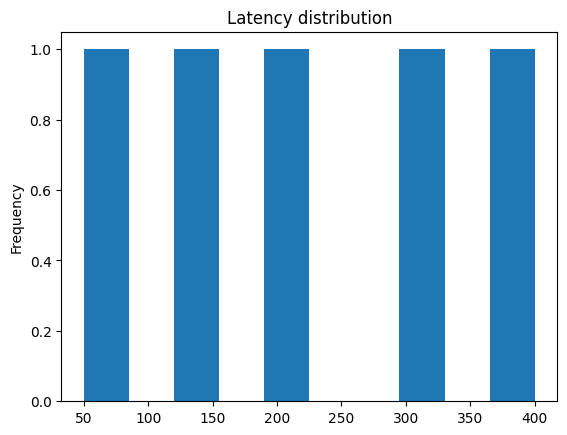

In [18]:
# 6. Distribution histogram (numeric column)
df["latency_ms"].plot(kind="hist", bins=10, title="Latency distribution")

<Axes: title={'center': 'metrics.relevance'}, xlabel='metadata.region'>

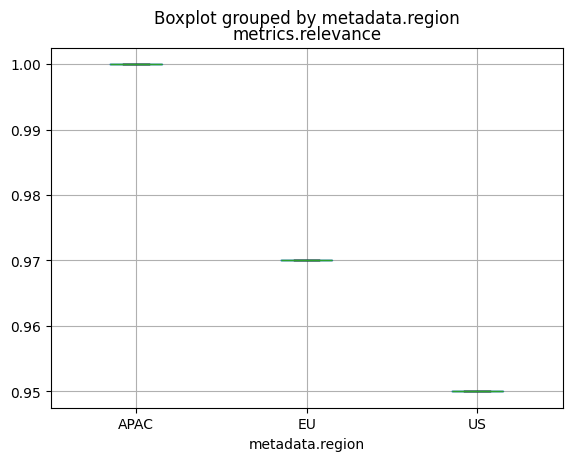

In [19]:
# 7. Boxplot
df.boxplot(column="metrics.relevance", by="metadata.region")

In [20]:
df.isna().mean().sort_values(ascending=False).head(10)

output.it                        0.8
output.es                        0.8
output.fr                        0.8
input                            0.8
final_output.fr                  0.8
final_output.es                  0.8
final_output.it                  0.8
output_docs                      0.8
token_usage.completion_tokens    0.4
token_usage.prompt_tokens        0.4
dtype: float64